In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [ ]:
import os
os.listdir(project_path)

['images.npy',
 'Face_mask_segmentation_Questions_Project_CV_AIML_Online.ipynb',
 'Untitled (1)',
 'Untitled0.ipynb',
 'Face_Segmentation.ipynb',
 'Untitled',
 'Face_recognition_Questions_Project_CV_AIML_Online(1).ipynb',
 'Untitled1.ipynb',
 'NLP_Project_Sarcasm_Detection_Questions.ipynb',
 'Copy of NLP_Project_Sarcasm_Detection_Questions.ipynb',
 'Untitled2.ipynb',
 'input_data.xlsx',
 'TicketAssignment.ipynb']

In [ ]:
file_name ='input_data.xlsx'

In [ ]:
import pandas as pd 
import numpy as np 
import re 
import sys
itTicketDF=pd.read_excel(project_path+file_name,encoding=sys.getfilesystemencoding())
itTicketDF.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [ ]:
#Check for blanks

itTicketDF.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
callers = itTicketDF['Caller'].unique() 
callers.shape
itTicketDF.drop(["Caller",'Short description'],axis=1,inplace= True)
itTicketDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8499 non-null   object
 1   Assignment group  8500 non-null   object
dtypes: object(2)
memory usage: 132.9+ KB


In [ ]:
targetClassCnt=itTicketDF['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

In [ ]:
#We are more interested in Description column as it clearly looks like superset of short description
#So lets see that row with blank value for Description

itTicketDF[itTicketDF['Description'].isna()]

Description Assignment group
4395         NaN            GRP_0

In [ ]:
sample = itTicketDF.groupby(['Assignment group'])
regroup=[]
for grp in itTicketDF['Assignment group'].unique():
  if(sample.get_group(grp).shape[0]<10):
    regroup.append(grp)
print('Found {} groups which have under 10 samples'.format(len(regroup)))
itTicketDF['Assignment group']=itTicketDF['Assignment group'].apply(lambda x : 'misc_grp' if x in regroup  else x)

# Unique Groups check 
itTicketDF['Assignment group'].unique()

Found 25 groups which have under 10 samples


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'misc_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62', 'GRP_65'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


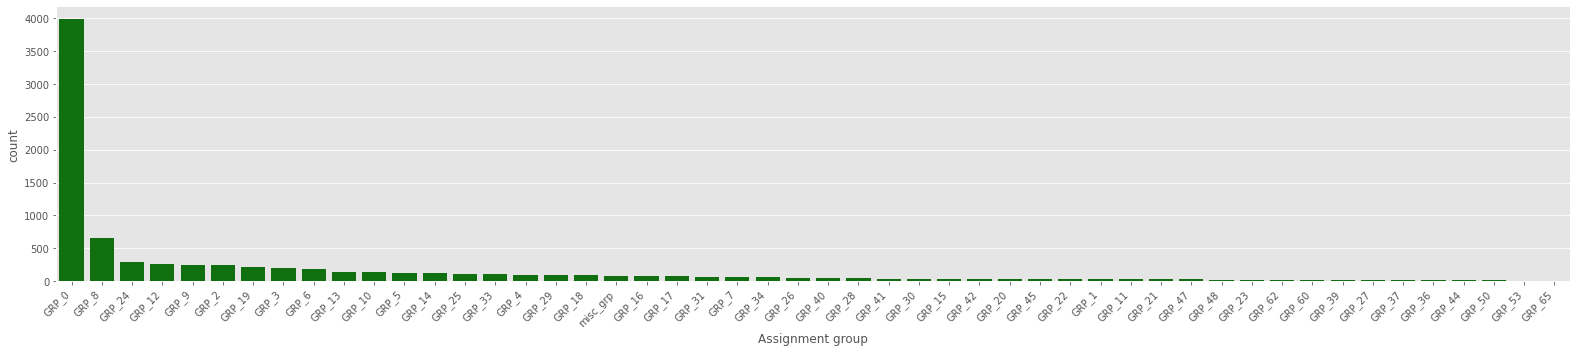

In [ ]:
##Pre-Processing label Encoding on  Assignment Group
import seaborn as sns
import matplotlib.pyplot as plt
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = itTicketDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=itTicketDF, color='green',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#Fill 'Decsription' field entries that have null with blank space
itTicketDF['Description'].fillna(value=' ', inplace=True)

In [ ]:
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
itTicketDF['Description'] = itTicketDF['Description'].apply(clean_data)

In [ ]:
itTicketDF['length']=[len(text) for text in itTicketDF['Description']]
itTicketDF=itTicketDF[itTicketDF['length']>=3]
itTicketDF['Description'] = itTicketDF['Description'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


https://machinelearningmastery.com/develop-neural-machine-translation-system-keras/

#for translation of german words to english

In [ ]:
germanwordlist = ['bitte','nicht','konto','probleme','berechtigung','defekt','mehr','ausgetauscht','rechner', 'drucker','teilweise','freigegeben','genannten','anmeldeaccount',
                  'besprochen','werden','durchwahl','oben','einrichten','zeitwirtschaft','seit','morgens','beheben','keine','zeitbuchungen','vorhanden','dringend','fehler',
                  'werk','anmelde','auftrag','kein','skannen','freundlichen','werkzeuge,','hartstoffe','maste','schutzw','fertigung','immer','sehr','zugriff','freundliche',
                  'geehrter','souzarft','noch','verbindungsherstellung','meldung','erneuten','glich','proben','beilageproben','beilage','auswerten','sinterleitstand','reparar',
                  'reparo','rechner','koenigsee','entregar','atualiza','declara','programdntya','funcionando','preciso','hitacni','grergtger','zugriffsrechte','teamleiter',
                  'abholen','wegen','weit','absender','wenn','abrechnung','abended']
pattern = '|'.join(germanwordlist)

pattern

'bitte|nicht|konto|probleme|berechtigung|defekt|mehr|ausgetauscht|rechner|drucker|teilweise|freigegeben|genannten|anmeldeaccount|besprochen|werden|durchwahl|oben|einrichten|zeitwirtschaft|seit|morgens|beheben|keine|zeitbuchungen|vorhanden|dringend|fehler|werk|anmelde|auftrag|kein|skannen|freundlichen|werkzeuge,|hartstoffe|maste|schutzw|fertigung|immer|sehr|zugriff|freundliche|geehrter|souzarft|noch|verbindungsherstellung|meldung|erneuten|glich|proben|beilageproben|beilage|auswerten|sinterleitstand|reparar|reparo|rechner|koenigsee|entregar|atualiza|declara|programdntya|funcionando|preciso|hitacni|grergtger|zugriffsrechte|teamleiter|abholen|wegen|weit|absender|wenn|abrechnung|abended'

In [ ]:
germanDescIndex = itTicketDF[itTicketDF['Description'].str.contains(pattern)].index
germanDescIndex

Int64Index([ 223,  238,  251,  255,  265,  270,  272,  302,  304,  305,
            ...
            8435, 8436, 8439, 8442, 8448, 8460, 8462, 8466, 8467, 8499],
           dtype='int64', length=739)

In [ ]:
!pip install -q googletrans
from googletrans import Translator

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 952kB 8.5MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 


In [ ]:
def translateIfRequired(x):
    translator = Translator()
    if translator.detect(x).lang != 'en':
        translatedText = translator.translate(x).text
    else:
        translatedText = x
    return translatedText

In [ ]:
for rowId in germanDescIndex:
    itTicketDF['Description'][rowId] = translateIfRequired(itTicketDF['Description'][rowId])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
germanDescIndex_new = itTicketDF[itTicketDF['Description'].str.contains(pattern)].index
germanDescIndex_new

Int64Index([ 238,  446,  874,  914,  932,  995, 1233, 1543, 1572, 1576,
            ...
            8358, 8427, 8432, 8435, 8436, 8442, 8448, 8460, 8462, 8466],
           dtype='int64', length=244)

In [ ]:
itTicketDF['Description'][931]

'job sid stat failed job scheduler'

## Combine Description and Short Description

In [ ]:
itTicketDF.reset_index(drop=True,inplace=True)

itTicketDF['Description'] = itTicketDF['Description'].str.strip()
itTicketDF['Description'] = itTicketDF['Description'].str.lower()

from collections import OrderedDict
itTicketDF['Description']=itTicketDF['Description'].str.split().apply(lambda x:OrderedDict.fromkeys(x).keys()).str.join(' ')
itTicketDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8439 entries, 0 to 8438
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8439 non-null   object
 1   Assignment group  8439 non-null   object
 2   length            8439 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 197.9+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english')
for i,text in enumerate(itTicketDF['Description']):
  itTicketDF['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
!pip install -q spacy 
import spacy

In [ ]:
import sys
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

itTicketDF['Description'] = itTicketDF['Description'].apply(lemmatize_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
itTicketDF['Description'][931]

'kwddwdw hudfefwe nwfodmhc exurcwkm aramdnty iak urgent help please check din future raise issue well logistic manager johthryugftyson kmvwxdti uaoyhcep morning still solve yet encounter net weight high gross kgs physical erp sid vln show correct attach reference need advice happen since last email flow ksjfye fekfeealleh operation supervisor hello do nice day mit freundlichen best'

In [ ]:
!pip install -q pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 20.0MB/s 


In [ ]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

In [ ]:
import spacy

In [ ]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this 
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
combined_text=itTicketDF.Description.values.tolist()

In [ ]:
combined_text[1]

'hello team meeting skype etc appear outlook calendar somebody please advise correct kind'

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [ ]:
print(data_words[1])

['hello', 'team', 'meeting', 'skype', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
print(bigram_mod[data_words[1]])

['hello', 'team', 'meeting', 'skype', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
print(trigram_mod[bigram_mod[data_words[1]]])

['hello', 'team', 'meeting', 'skype', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [ ]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [ ]:
print(data_words_bigrams[1])

['hello', 'team', 'meeting', 'skype', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wordclouds=' '.join(map(str, data_words_bigrams))

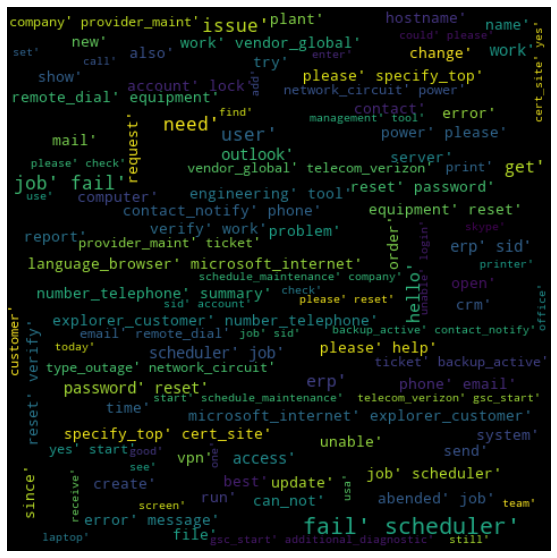

In [ ]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


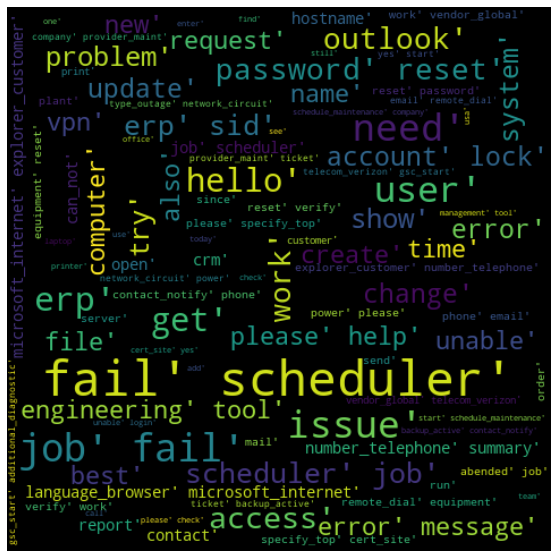

In [ ]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#Copying to new dataframe to create wordclouds on target class

new_df = itTicketDF.copy()
new_df['words'] = data_words_bigrams
new_df

Description  ...                                              words
0     verify user detail employee manager name check...  ...  [verify, user, detail, employee, manager, name...
1     hello team meeting skype etc appear outlook ca...  ...  [hello, team, meeting, skype, etc, appear, out...
2                                  can not log vpn best  ...                          [can_not, log, vpn, best]
3                               unable access tool page  ...                       [unable, access, tool, page]
4                                           skype error  ...                                     [skype, error]
...                                                 ...  ...                                                ...
8434  good afternoon receive email send mail please ...  ...  [good_afternoon, receive, email, send, mail, p...
8435                           telephony software issue  ...                        [telephony_software, issue]
8436       vip windows password reset tifpdchb pedxruyf  ...  [vip, windows, password, reset, tifpdchb, pedx...
8437  unable access machine utility finish drawer ad...  ...  [unable, access, machine, utility, finish, dra...
8438       several program type can not open . cnc area  ...  [several, program, type, can_not, open, cnc, a...

[8439 rows x 4 columns]

In [ ]:
#Sorting based on frequency of target class Assignment group

value = new_df['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'misc_grp', 'GRP_16', 'GRP_17',
       'GRP_7', 'GRP_31', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_1', 'GRP_22', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_23', 'GRP_62', 'GRP_60', 'GRP_39', 'GRP_30',
       'GRP_27', 'GRP_37', 'GRP_36', 'GRP_44', 'GRP_50', 'GRP_65', 'GRP_53',
       'GRP_48'],
      dtype='object')

In [ ]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

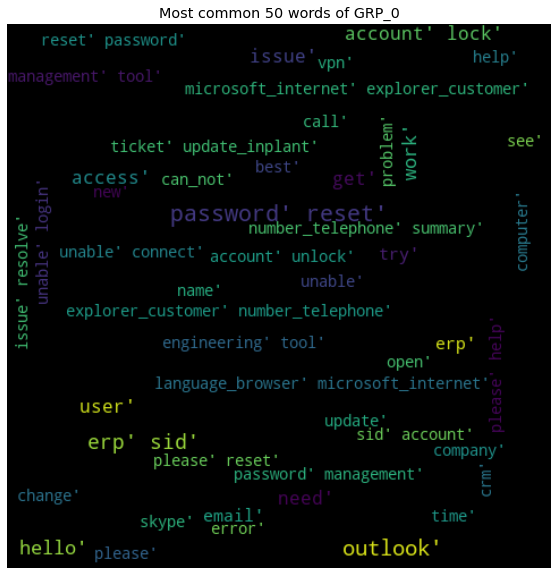

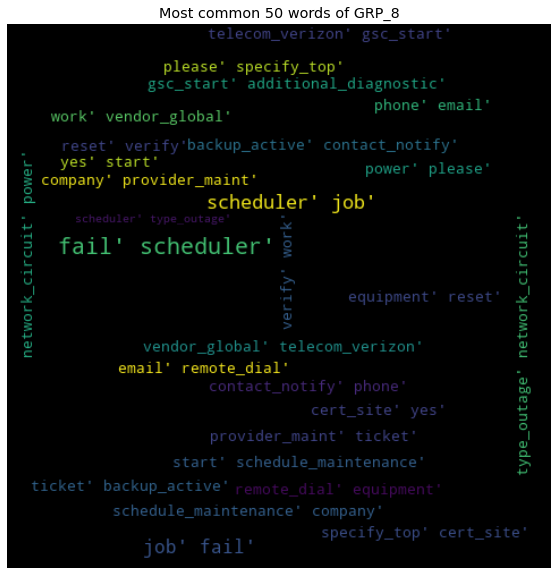

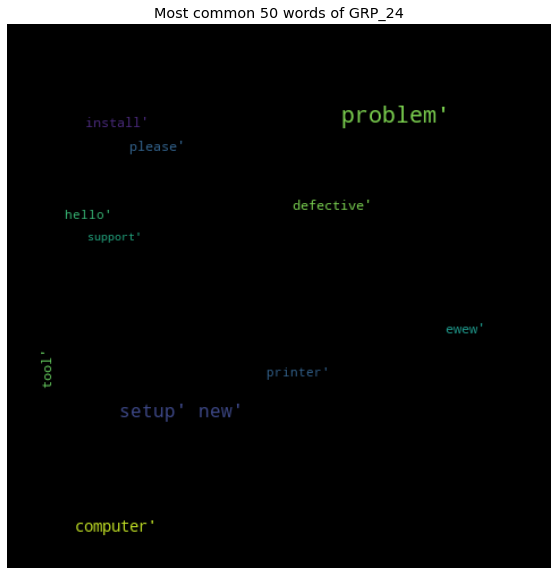

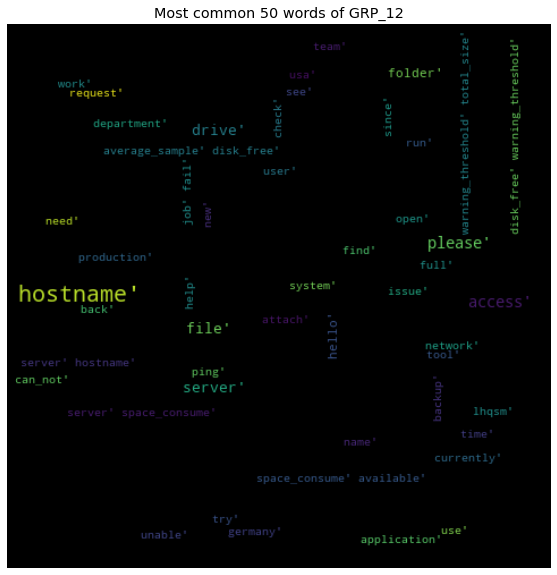

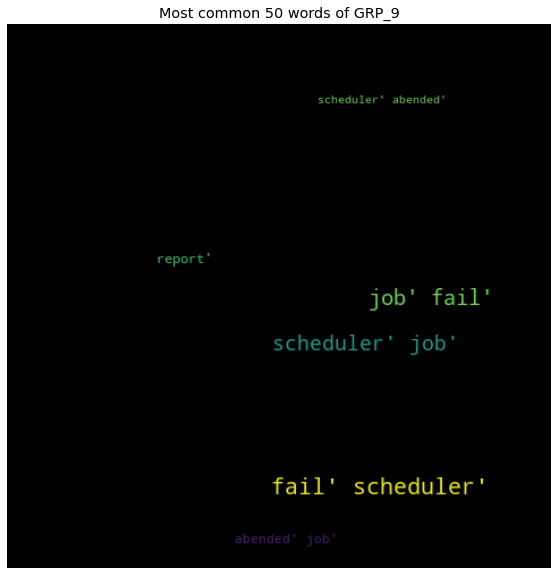

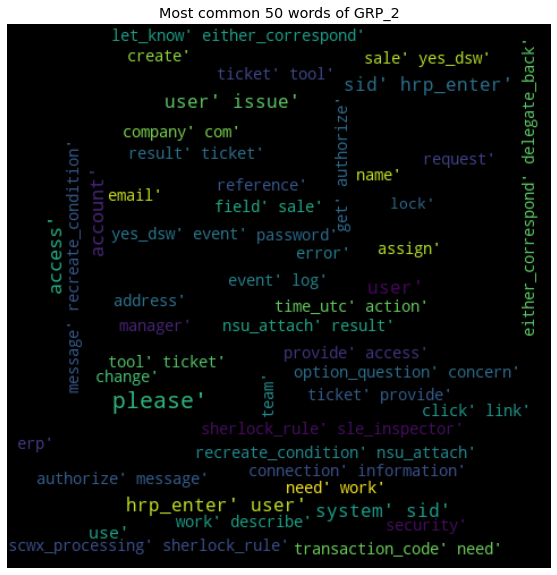

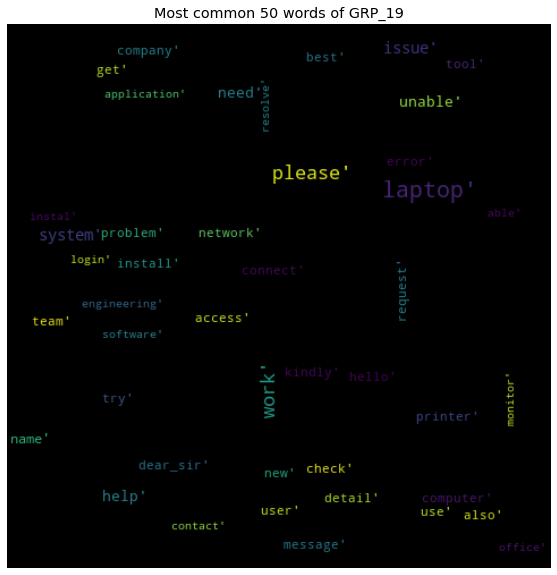

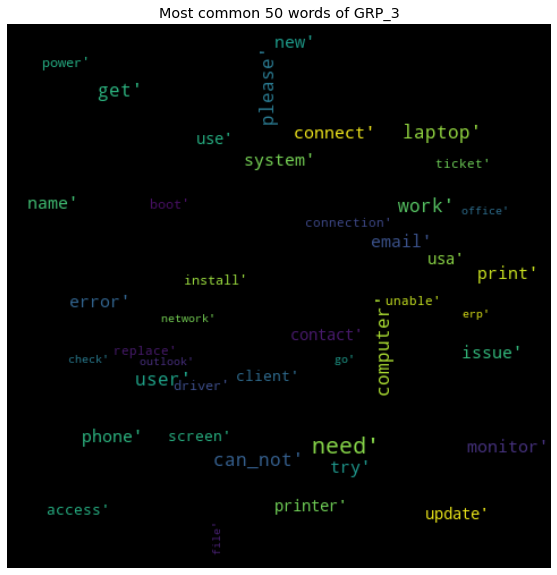

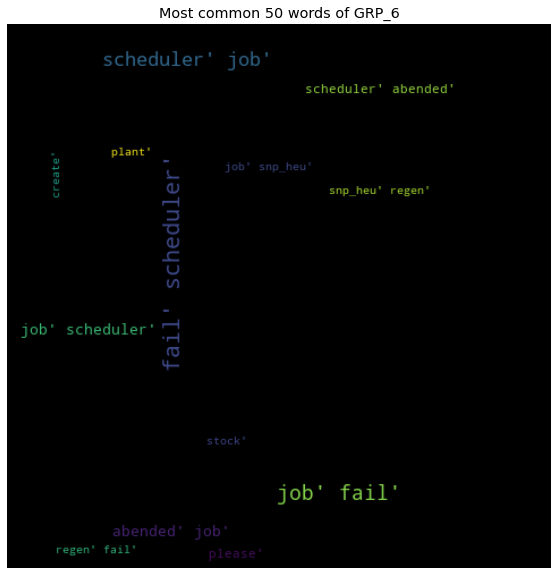

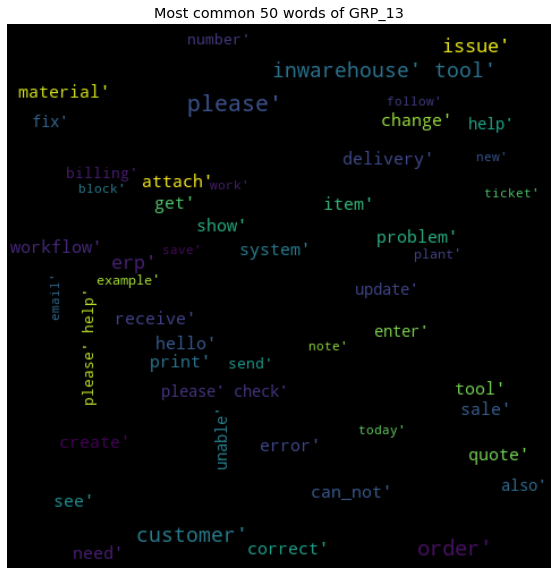

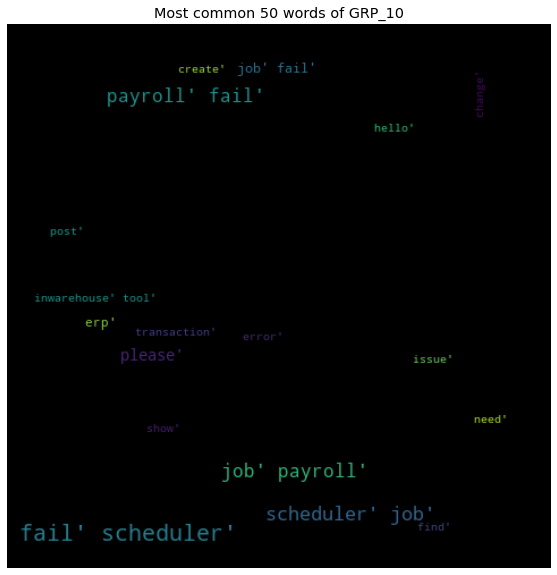

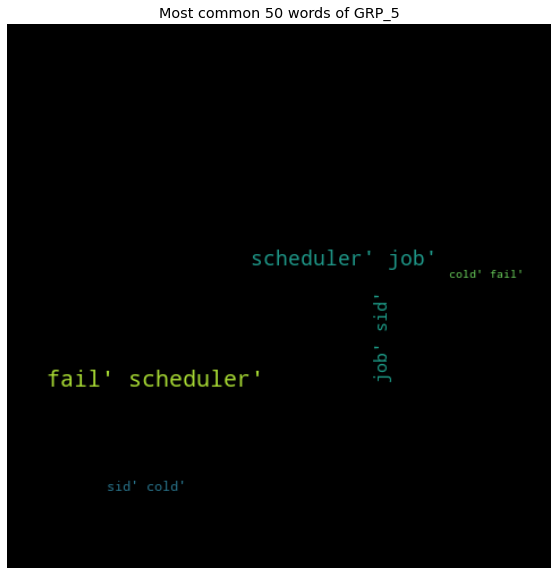

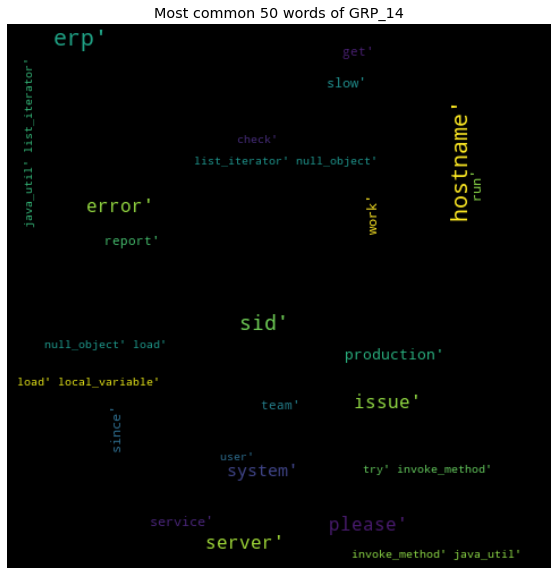

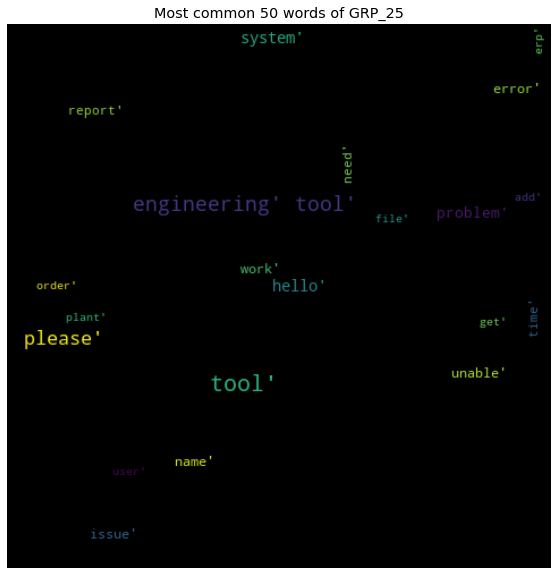

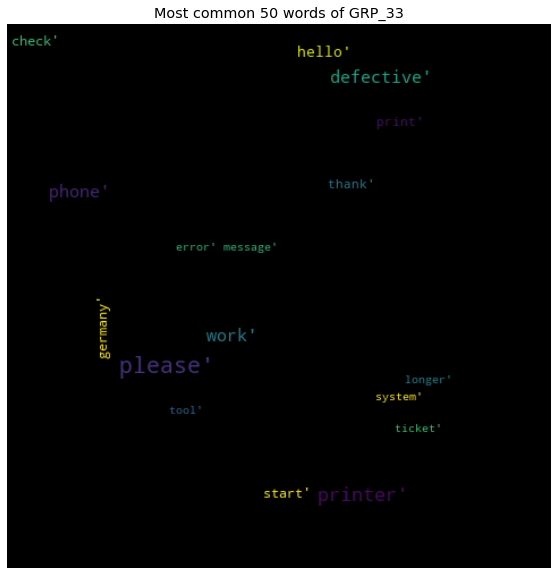

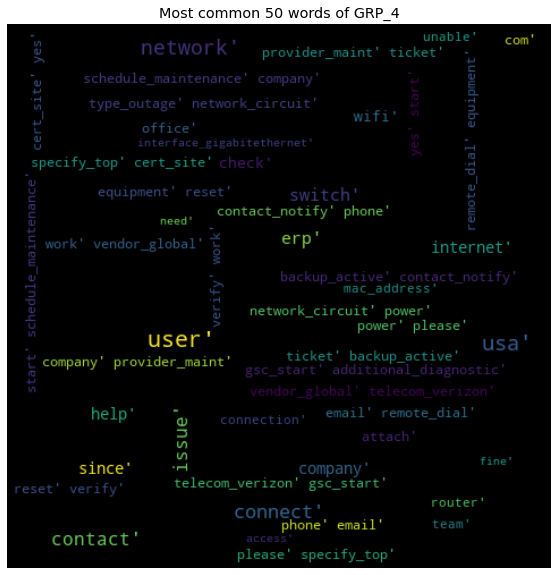

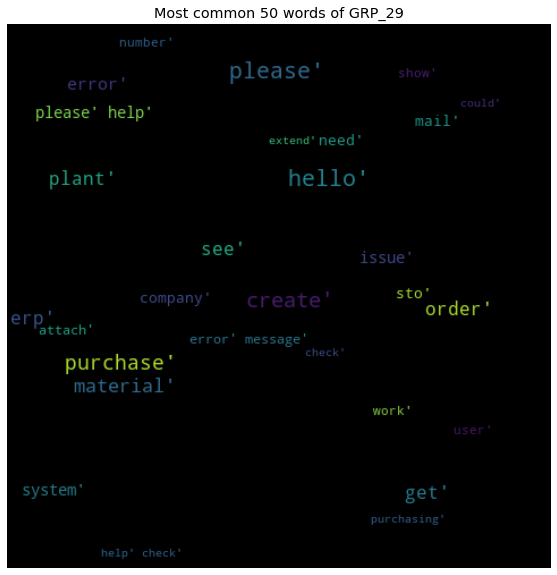

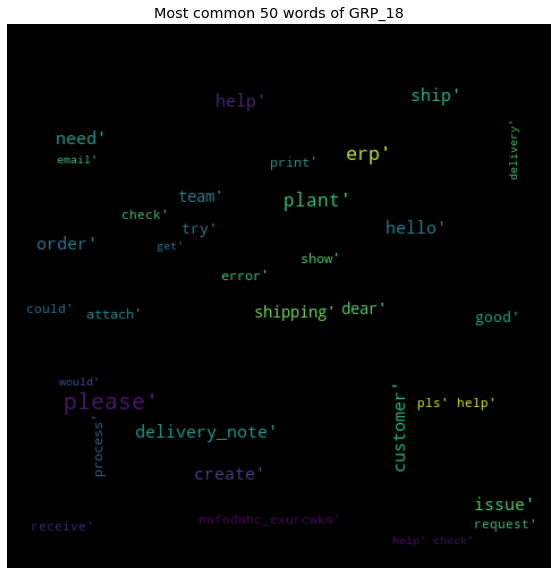

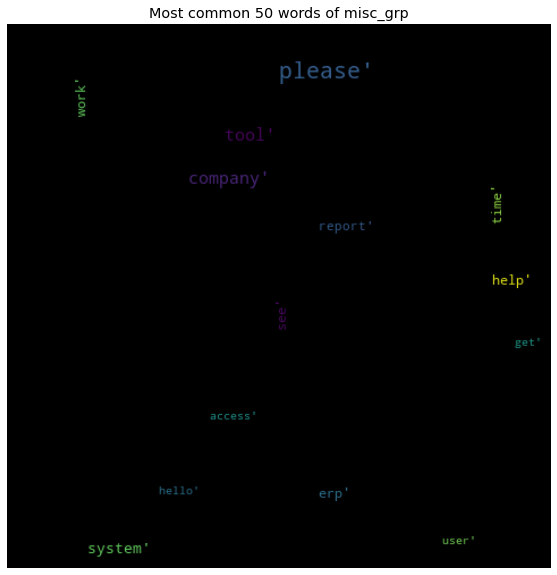

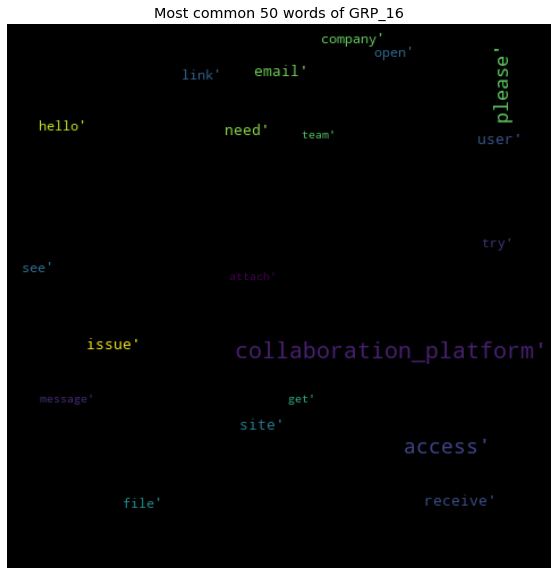

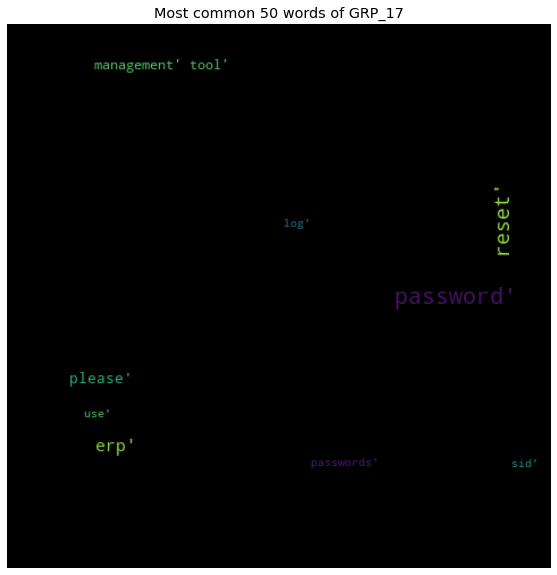

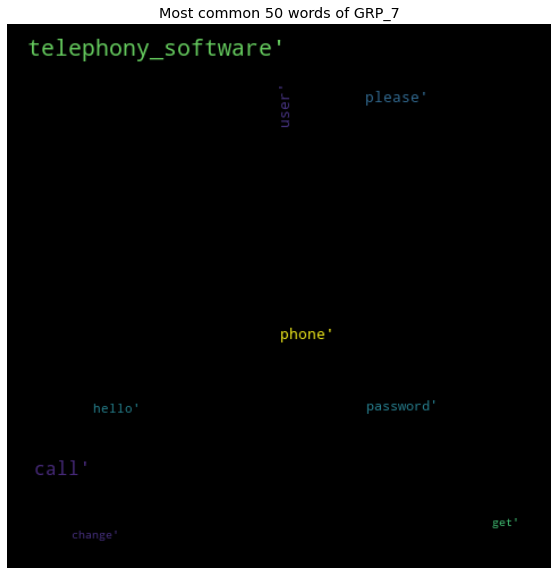

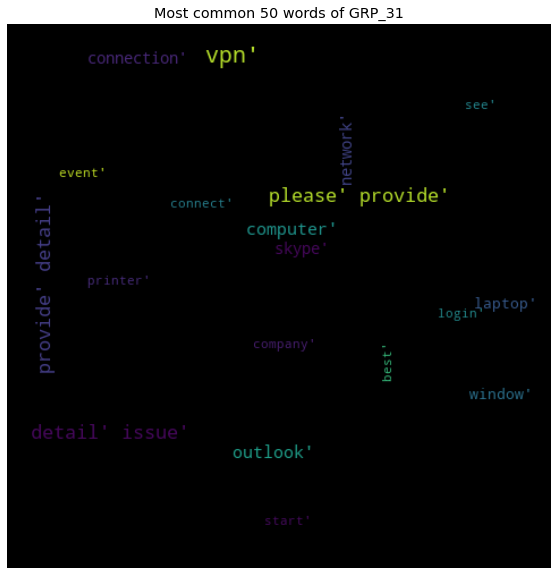

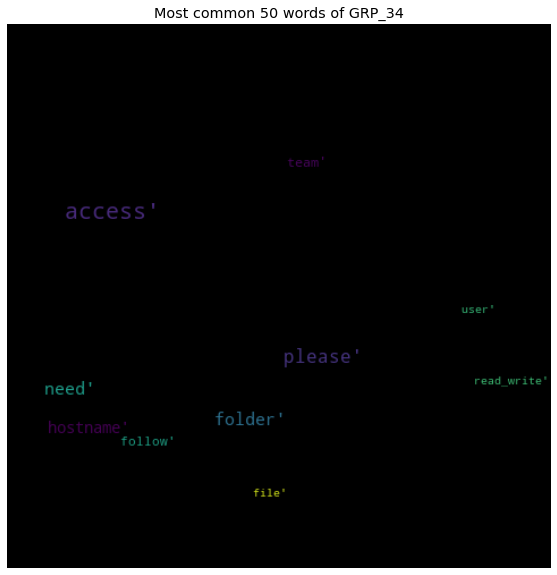

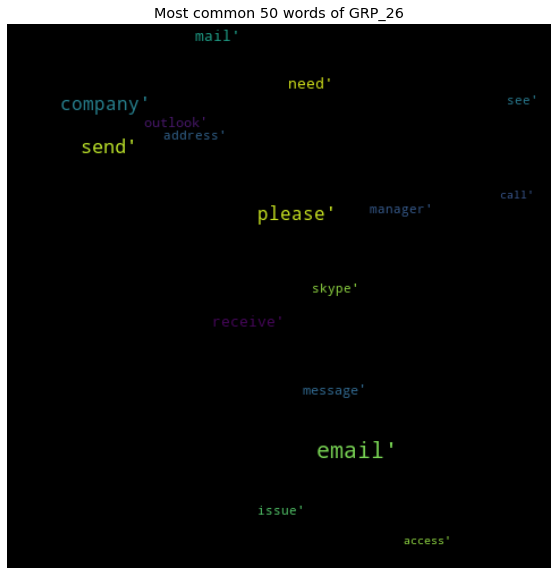

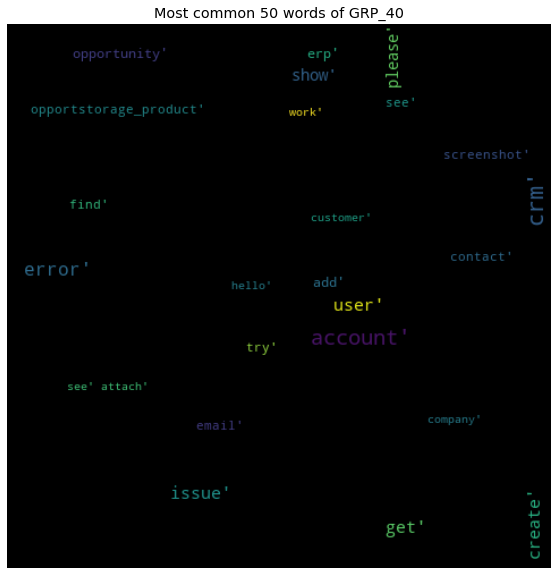

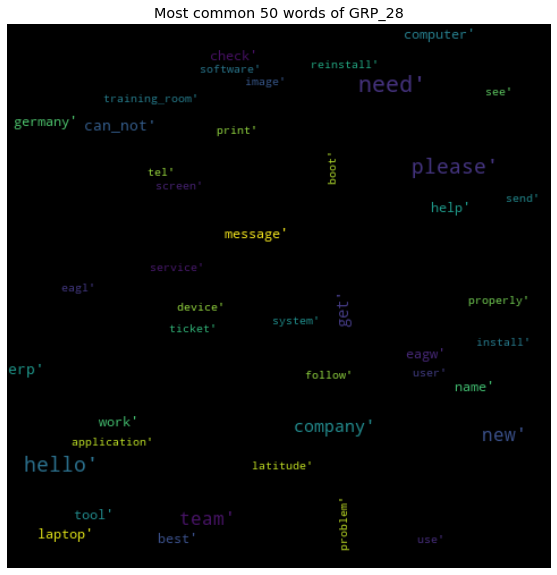

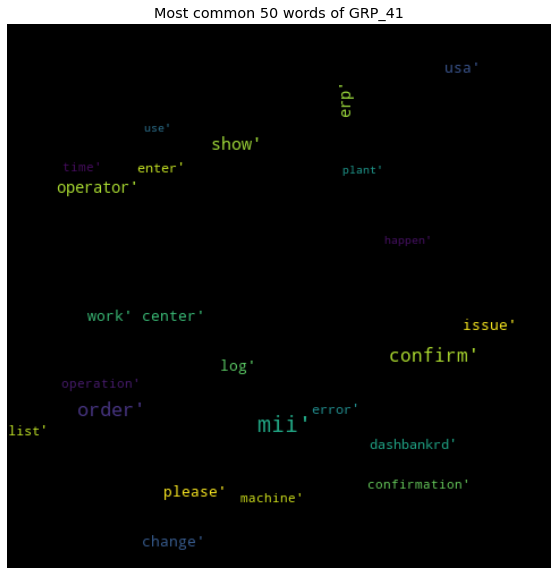

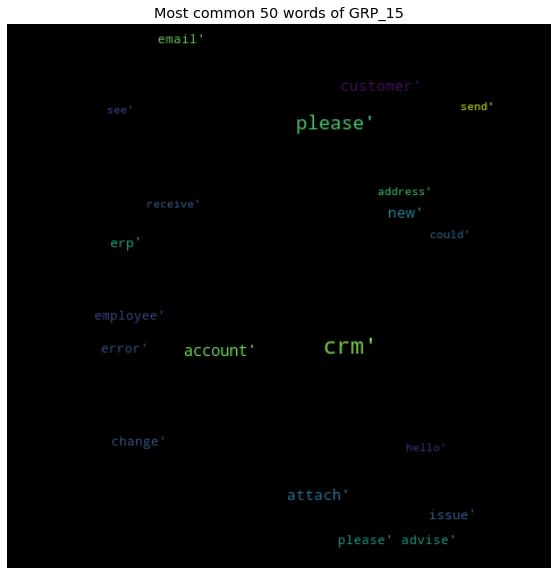

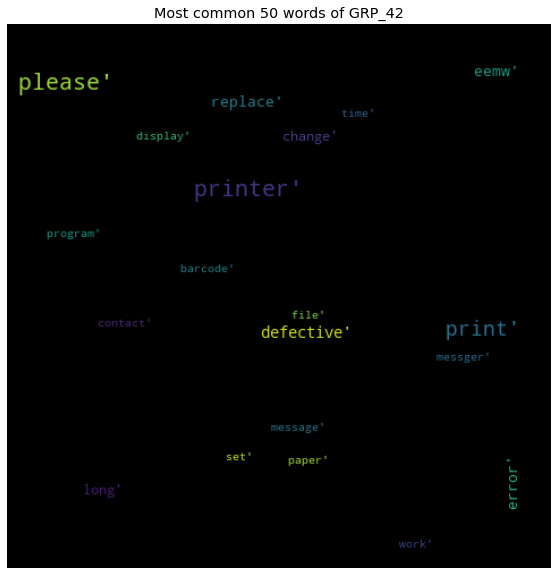

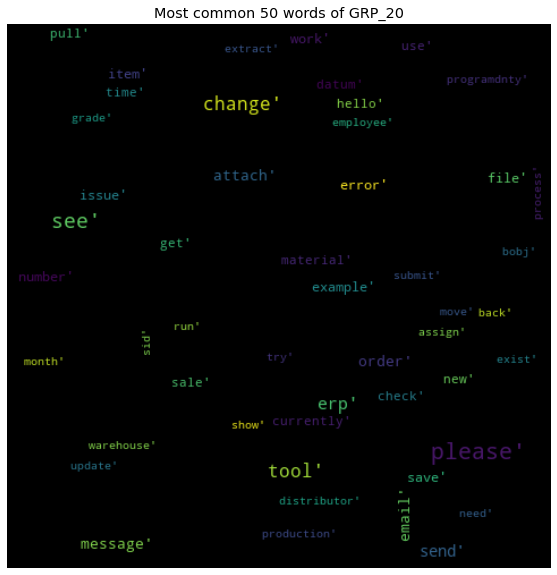

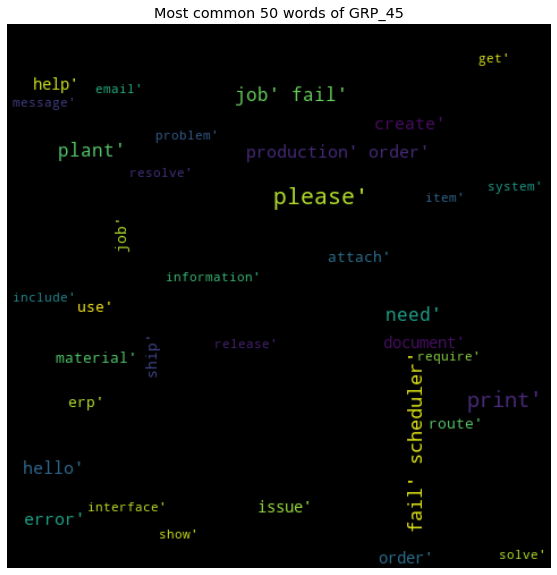

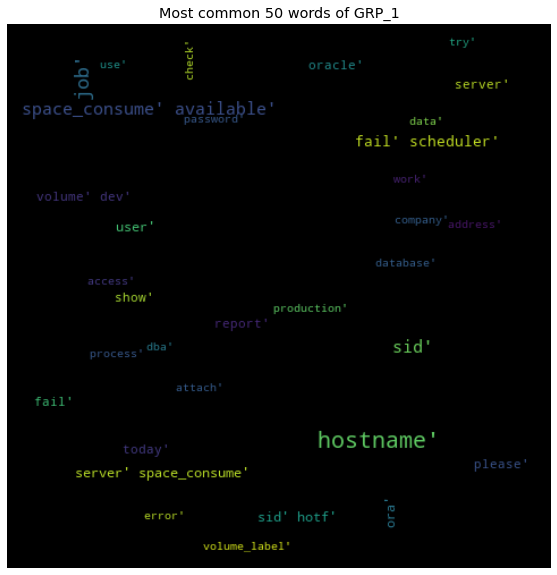

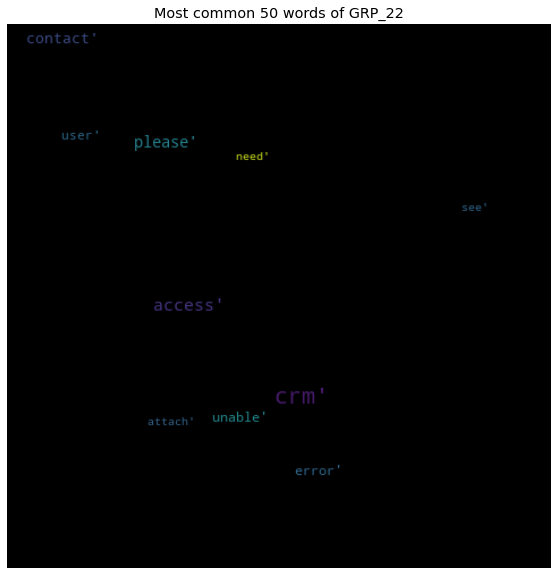

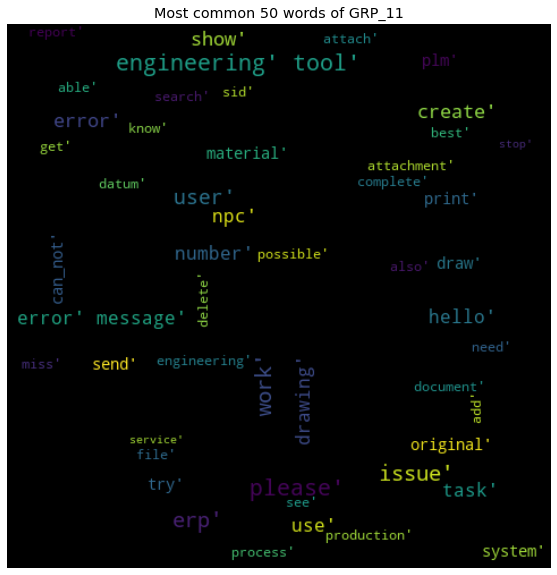

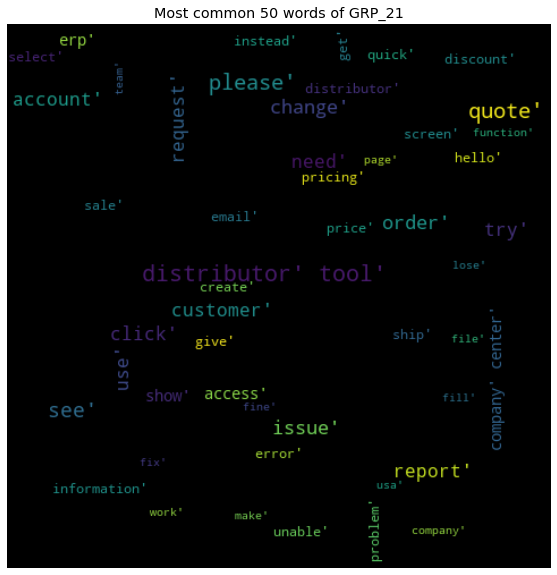

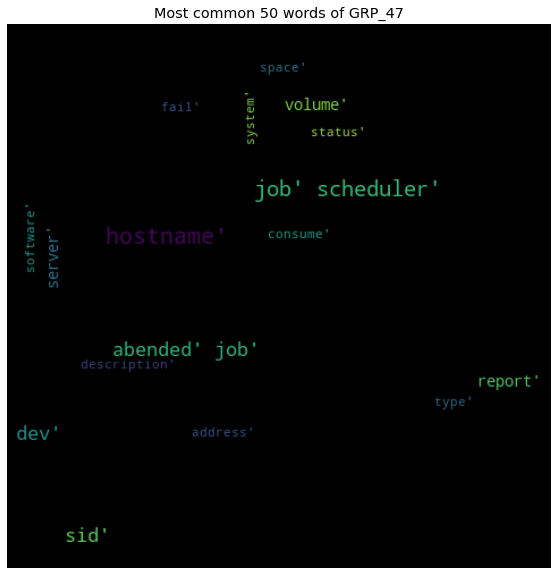

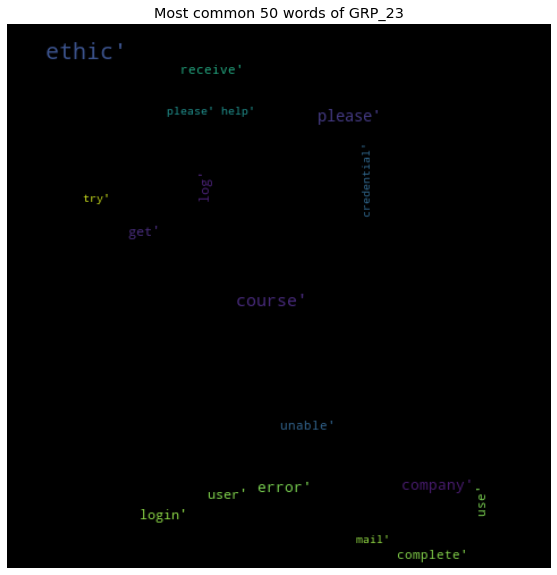

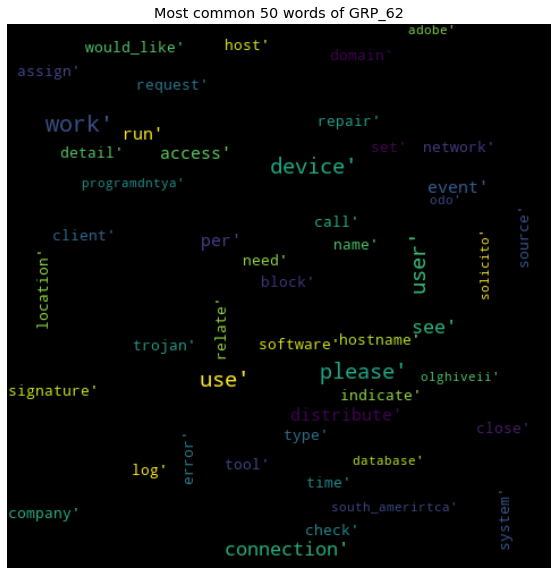

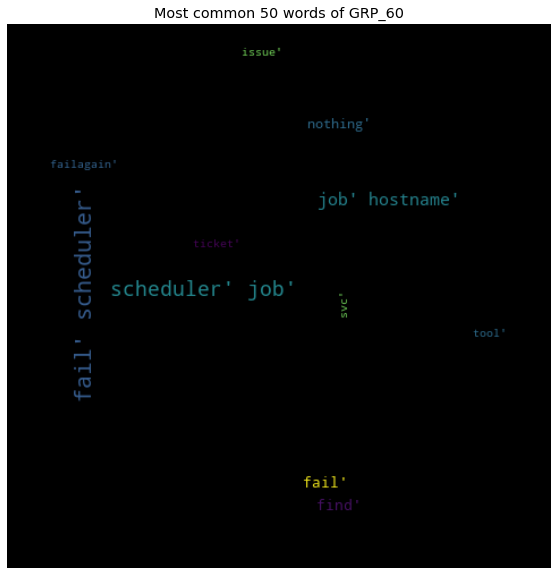

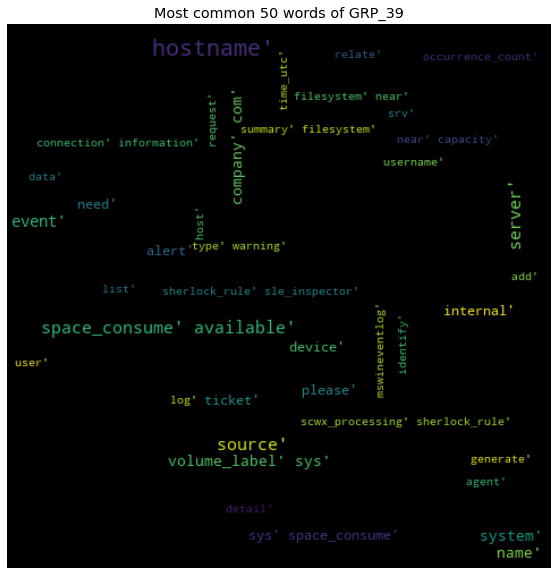

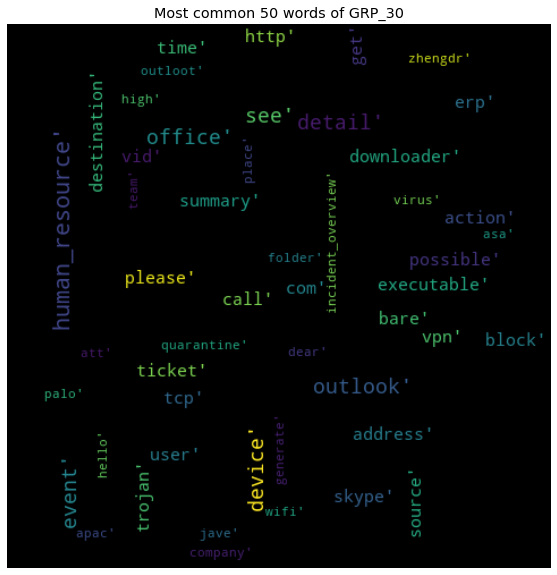

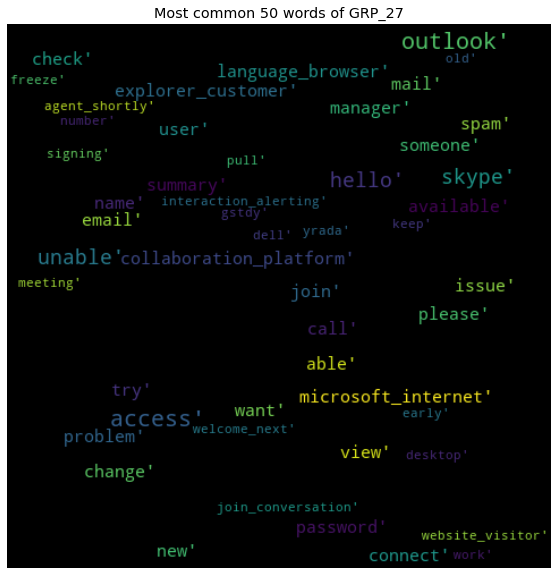

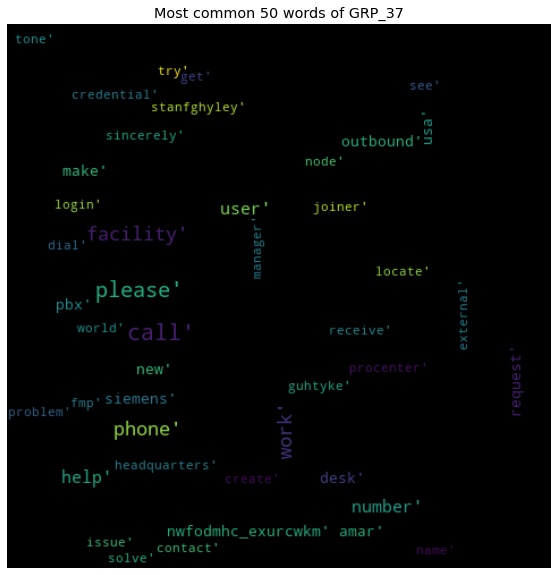

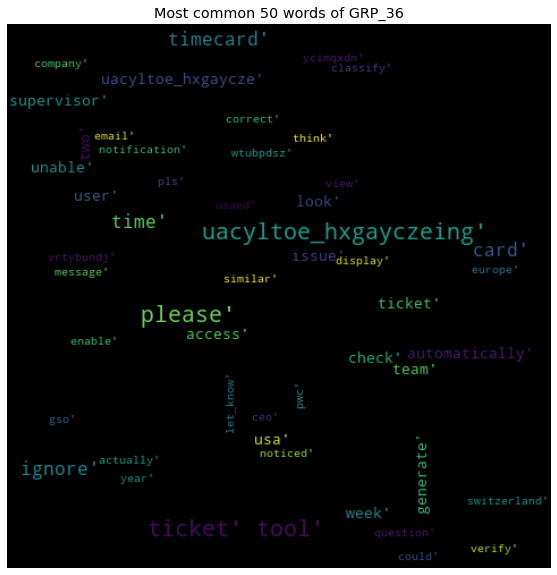

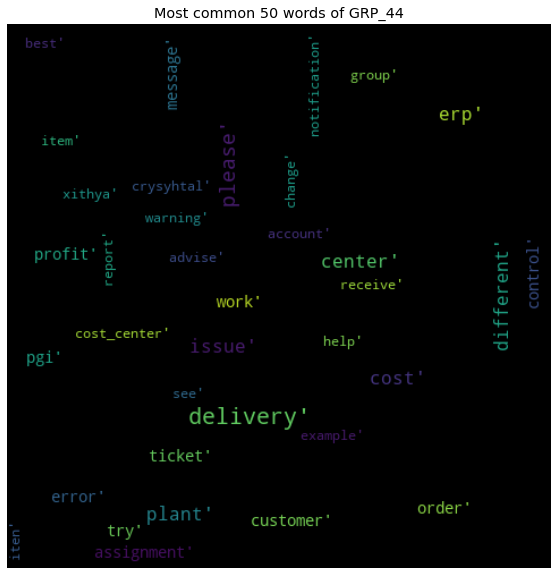

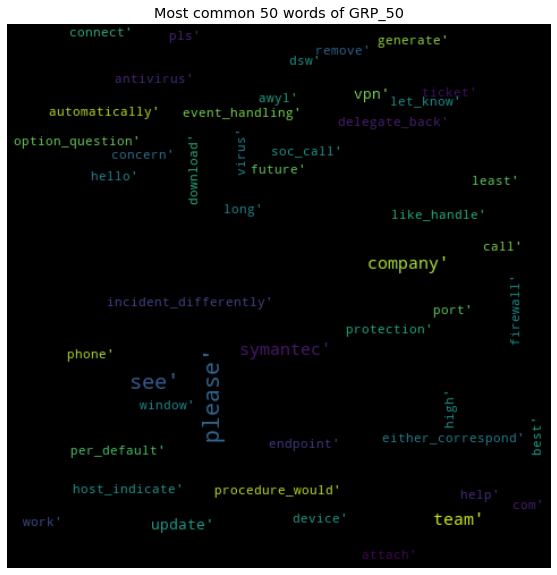

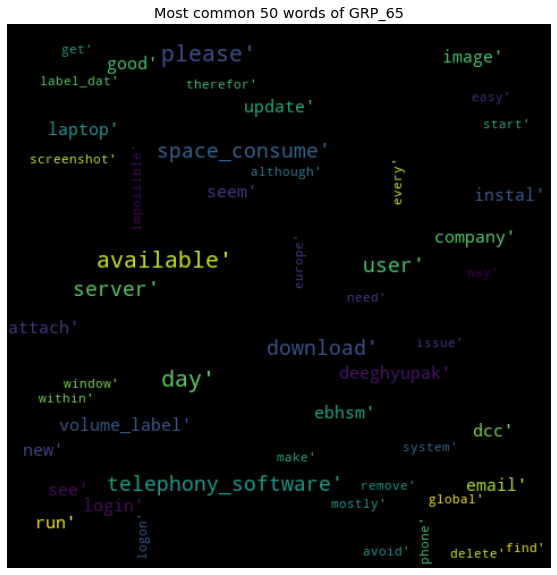

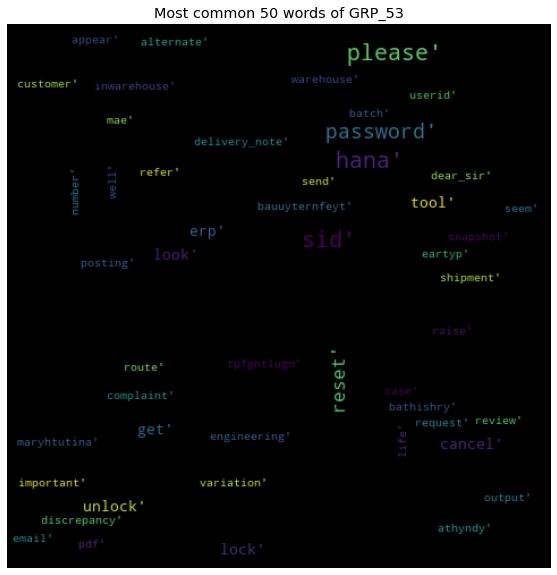

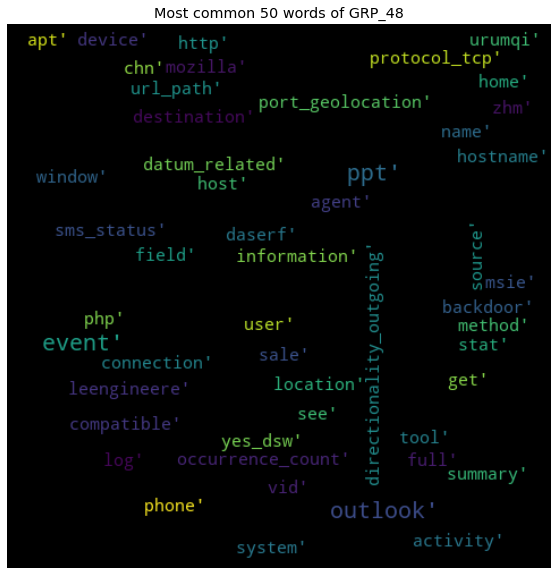

In [ ]:
#for loop to pass the top 50 Assignment groups

for i in range(50):

    Grp = new_df[new_df ['Assignment group'] == value[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,value[i])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus from post clean data 
texts = data_words_bigrams

# Term Document Frequency and Bag of words 
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# View not human readable 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


In [ ]:
#possible human redable 
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('able', 1), ('advise', 1), ('caller_confirm', 1), ('check', 2), ('detail', 1), ('employee', 1), ('issue', 1), ('login', 1), ('manager', 1), ('name', 1), ('password', 1), ('reset', 1), ('resolve', 1), ('user', 1), ('verify', 1)]]


Bag of word model is working with bi gram and trigram model getting more insight from the words and its frequencey in document 1  . 


1.   Caller_confirmed occur once in document 1 
2.   check occur twice  in document 1 


In [ ]:
# Build LDA model
#https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = LdaModel(corpus=corpus,id2word=id2word,num_topics=7,random_state=200,update_every=1,chunksize=800,passes=10,alpha='auto',per_word_topics=True)

In [ ]:
#top 7 topics from the corpus 
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"please" + 0.022*"name" + 0.022*"email" + 0.022*"company" + '
  '0.021*"start" + 0.020*"phone" + 0.019*"summary" + 0.018*"ticket" + '
  '0.018*"power" + 0.018*"reset"'),
 (1,
  '0.118*"job" + 0.110*"scheduler" + 0.076*"fail" + 0.047*"abended" + '
  '0.025*"sid" + 0.018*"hostname" + 0.008*"would_like" + 0.007*"forward" + '
  '0.006*"link" + 0.006*"inc"'),
 (2,
  '0.026*"hostname" + 0.011*"server" + 0.007*"agent" + 0.007*"code" + '
  '0.007*"full" + 0.006*"hana" + 0.006*"service" + 0.006*"available" + '
  '0.006*"cold" + 0.005*"see"'),
 (3,
  '0.063*"password" + 0.056*"erp" + 0.055*"account" + 0.045*"reset" + '
  '0.038*"sid" + 0.035*"user" + 0.030*"lock" + 0.017*"detail" + '
  '0.016*"windows" + 0.016*"unlock"'),
 (4,
  '0.033*"please" + 0.014*"hello" + 0.012*"team" + 0.010*"find" + 0.010*"need" '
  '+ 0.010*"create" + 0.010*"check" + 0.009*"help" + 0.009*"company" + '
  '0.009*"follow"'),
 (5,
  '0.029*"ticket" + 0.019*"print" + 0.019*"printer" + 0.019*"update" + '
  '0.0

In [ ]:
texts=data_words_bigrams
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.321869945492891

Coherence Score:  0.4915130343825265


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.249848  0.017329       1        1  29.474545
4      0.210196  0.096600       2        1  23.980566
3      0.003493 -0.314065       3        1  11.830740
0     -0.015118  0.022303       4        1   9.382531
5      0.003799  0.039469       5        1   8.987001
2     -0.194544  0.194873       6        1   8.942030
1     -0.257674 -0.056510       7        1   7.402588, topic_info=          Term        Freq       Total Category  logprob  loglift
165        job  801.000000  801.000000  Default  30.0000  30.0000
189  scheduler  751.000000  751.000000  Default  29.0000  29.0000
10    password  870.000000  870.000000  Default  28.0000  28.0000
188       fail  520.000000  520.000000  Default  27.0000  27.0000
94     account  603.000000  603.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
47         sid  169.998489  597.720886   Topic7  -3.6895   1.3460
259        inc   38.857971   97.158218   Topic7  -5.1654   1.6869
80        link   41.643070  133.506821   Topic7  -5.0962   1.4383
33        tool   23.945755  754.648499   Topic7  -5.6495  -0.8471
359     follow   21.897558  240.343109   Topic7  -5.7390   0.2076

[369 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
8286      7  0.998784     abended
0         1  0.761742        able
0         3  0.199127        able
0         5  0.034768        able
31        1  0.737511      access
...     ...       ...         ...
594       1  0.989173       would
1099      7  0.981504  would_like
1903      2  0.980947       wrong
277       4  0.996223         yes
960       3  0.974398     yes_dsw

[477 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 4, 1, 6, 3, 2])

# Provide info to business 

In [ ]:
# add a deep copy to another dataframe itTicketDF  to other DF
data =  itTicketDF.copy()
data['num_words'] = data.Description.apply(lambda x : len(x.split()))
data.describe().transpose()

count        mean         std  min   25%   50%    75%     max
length     8439.0  141.761228  312.312703  3.0  34.0  58.0  148.0  6190.0
num_words  8439.0   11.862661   18.532573  0.0   3.0   6.0   14.0   434.0

In [ ]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [ ]:
word_distribution

bins  counts
0    0-100    8340
1  100-300      33
2  300-500       7
3  500-800       0
4     >800       0

Text(0.5, 1.0, 'Word distribution per bin')

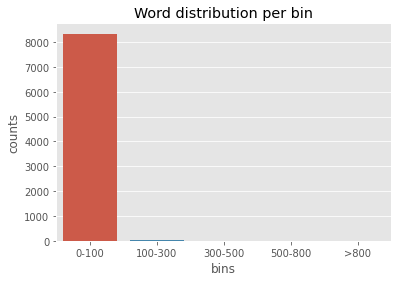

In [ ]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

**Observation**
*   Most of the descrption of the problems raised by callers are short with in 0-100 words
*   Few items are with bit descriptive 

# Generate Dataset for createing 2 models
- Model 1 : Group 0 & all other groups combined to "other"
- Model 2 : Group 0 removed & only includes other groups
- Model 1 will be use dto classing group 0. If not found to be Group 0, we can classify using Model 2.

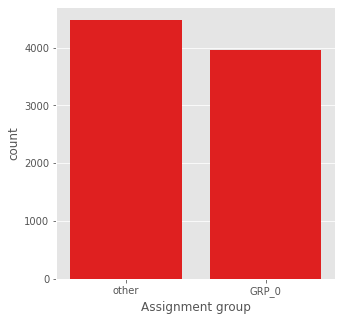

In [ ]:
# Create the Dataset for classifying GRP_0
itTicketGRP0DF = itTicketDF.copy()
itTicketGRP0DF['Assignment group']=itTicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = itTicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=itTicketGRP0DF, color='red',order=descending_order)

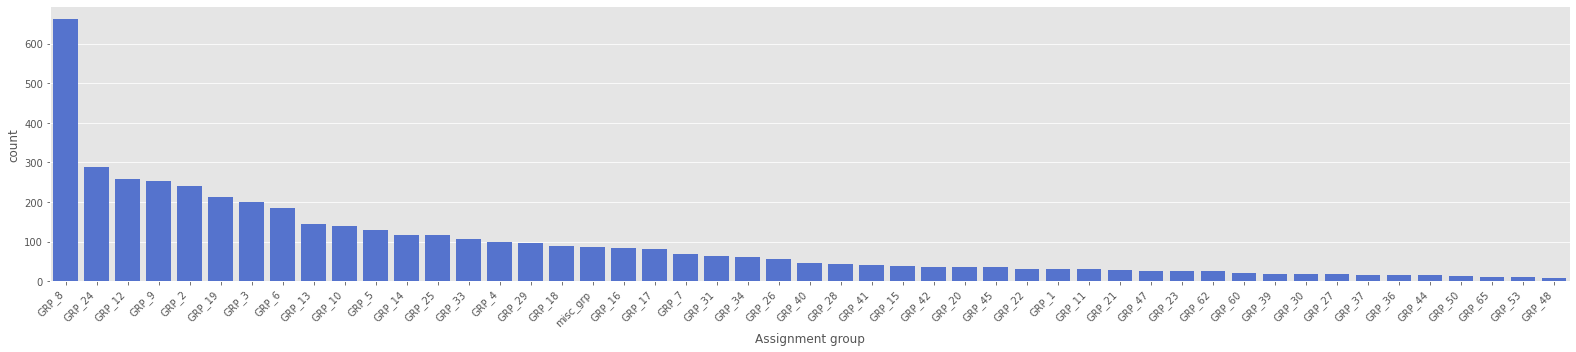

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
itTicketOthersDF = itTicketDF[itTicketDF['Assignment group'] != 'GRP_0']

descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Observation
- There is high imbalance within the other group

In [ ]:
maxOthers = itTicketOthersDF['Assignment group'].value_counts().max()
maxOthers

661

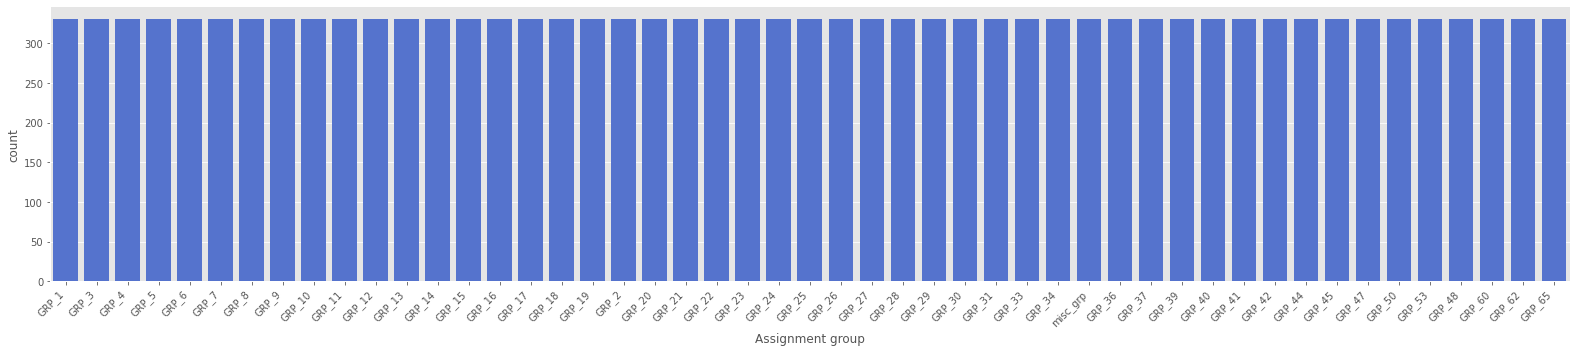

In [ ]:
# Treat the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample
itTicketOthersDF_resampled = itTicketOthersDF[0:0]
for grp in itTicketOthersDF['Assignment group'].unique():
    itTicketGrpDF = itTicketOthersDF[itTicketOthersDF['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    itTicketOthersDF_resampled = itTicketOthersDF_resampled.append(resampled)

otherGrpsResampled = pd.concat([itTicketGRP0DF,itTicketOthersDF_resampled])
otherGrpsResampled.reset_index(inplace=True)

descending_order = itTicketOthersDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

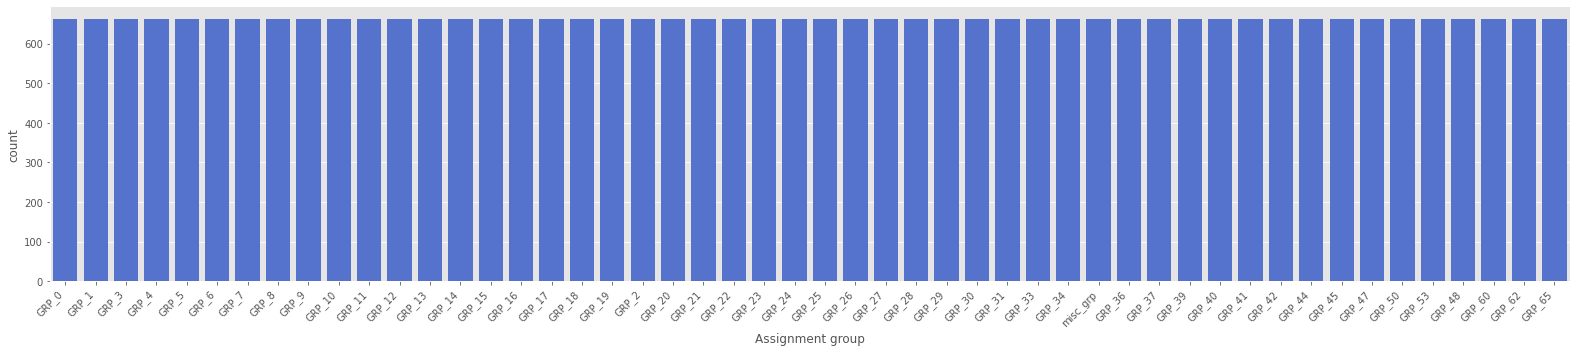

In [ ]:
# Treat the imbalance in the itTicketDF dataset by resampling to 661.This is for us to try creating a single model which use the whole dataset & verify the performance
itTicketDF_resampled = itTicketDF[0:0]
for grp in itTicketDF['Assignment group'].unique():
    itTicketGrpDF = itTicketDF[itTicketDF['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
    itTicketDF_resampled = itTicketDF_resampled.append(resampled)

descending_order = itTicketDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Label Encoding 'Assignment group' target class 


In [ ]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
itTicketDF['Assignment group'],grp_mapping_all_raw = labelencoder(itTicketDF['Assignment group'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# Modelling


In [ ]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Add Function to capture results from each model 
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','descriptions']] 
  return dataframe

## Word2Vec embedding 

In [ ]:
sentences = [line.split(' ') for line in itTicketDF['Description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format(project_path+ 'word2vec_vector.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open(project_path+'word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 9361 word vectors.


In [ ]:
maxlen = 300
numWords=9000
epochs = 10

In [ ]:
results=pd.DataFrame()
pred_results = pd.DataFrame()

### LSTM Model


In [ ]:
class LstmModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    self.model.summary()
    plot_model(self.model,to_file="LSTM_Model.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmModel()
lstmModelRawData_history, model = lstmModelRawData.train(itTicketDF,100,epochs)
rawData_accuracy = lstmModelRawData.prediction()

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 100)          900100    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
Total params: 

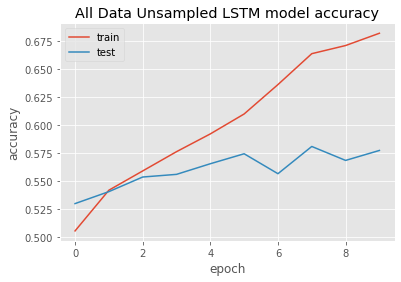

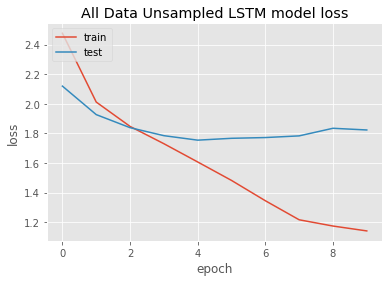

In [ ]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

In [ ]:
# Check how the LSTM Model perform with all the data which is cleansed & resampled to 661 to make the target balance
lstmModelAllDataResampled = LstmModel()
lstmModelAllDataResampled_history, model = lstmModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
resampled_accuracy = lstmModelAllDataResampled.prediction()


Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 100)          900100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               234496    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
Total param

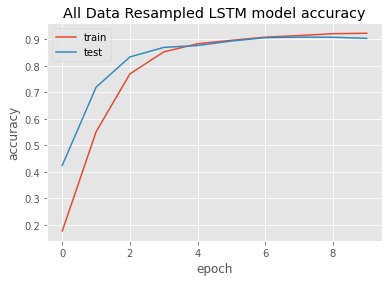

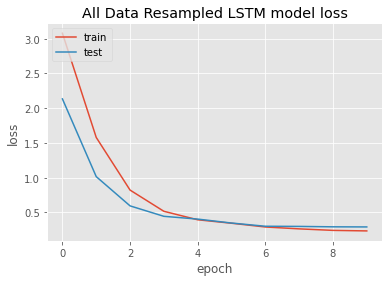

In [ ]:
lstmModelAllDataResampled.plotModelAccuracy(lstmModelAllDataResampled_history, 'All Data Resampled LSTM')

#### Dataframe result capture

In [ ]:
results=pd.DataFrame()
pred_results = pd.DataFrame()
results=captureData(results,lstmModelRawData_history,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',rawData_accuracy,0)

In [ ]:
results=captureData(results,lstmModelAllDataResampled_history,'LSTM model_WV_resampled data','LSTM+Word2Vec Embedding on Augmented data','2',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_resampled data','LSTM+Word2Vec Embedding on Augmented data','2',resampled_accuracy,0)

### LSTM two part model


In [ ]:
class TwoModel:

  model_1 = Model()
  model_2 = Model()
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return tokenizer,dataframe

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, X_test, y_train, y_test, X_Val, y_Val

  def runFirstModel(self,dataframe,epochs):

    grp0_df = dataframe.copy()
    grp0_df['Assignment group']=dataframe['Assignment group'].apply(lambda x : 1 if x != 0  else x)
    tokenizer,X = self.wordTokenizer(grp0_df['Description'])
    y = np.asarray(grp0_df['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    model_history,self.model_1 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_1

  def runSecondModel(self, dataframe,epochs):

    grpOthers_df = dataframe.copy()
    grpOthers_df = grpOthers_df[grpOthers_df['Assignment group'] != 0]
    grpOthers_df['Assignment group']=grpOthers_df['Assignment group'] - 1
    tokenizer,X = self.wordTokenizer(grpOthers_df['Description'])
    y = np.asarray(grpOthers_df['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
      
    model_history,self.model_2 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_2

  def modelRunner(self, X,Y,X_Val,Y_Val,epochs):
        
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(input_dim = numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense =Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(Y)).unique()),activation='softmax')(dense)   
        batch_size = 100
        
        model = Model(input_layer,out)
        model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
        
        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        
        model_history = model.fit(X,Y,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,Y_Val))
        return model_history,model

  def predict(self, X_test):
        predBinary = self.model_1.predict(X_test)
        predBinary = [1 if j>i else 0 for i,j in predBinary]

        new_X_test = pd.DataFrame(X_test)
        new_X_test['grp']=predBinary
        sec_input = new_X_test[new_X_test['grp']!=0]
        sec_input.drop(['grp'],inplace=True, axis=1)
        new_X_test=new_X_test[new_X_test['grp']==0]

        predOther = self.model_2.predict(sec_input)
        predOther = [i.argmax() for i in predOther]
        predOther= [i+1 for i in predOther]
        sec_input['grp']=predOther

        pred_df = pd.concat([new_X_test,sec_input])
        pred_df.sort_index(axis=0,inplace=True)

        return np.array(pred_df['grp'])

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()


In [ ]:
model = TwoModel()
model1_history,_ = model.runFirstModel(otherGrpsResampled,5)
model2_history,_ = model.runSecondModel(otherGrpsResampled,20)

tokenizer,X = model.wordTokenizer(otherGrpsResampled['Description'])
y = np.asarray(otherGrpsResampled['Assignment group'])
X = pad_sequences(X, maxlen = maxlen)
_, X_test, _, y_test, _, _ = model.splitData(X,y)

predictions = model.predict(X_test)
twoModel_sampledAccuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy:",twoModel_sampledAccuracy)

Number of Samples: 24609
Number of Labels:  24609
Number of train Samples: 19687
Number of val Samples: 4922
Epoch 1/5
197/197 [==============================] - ETA: 0s - loss: 0.3301 - accuracy: 0.8725
Epoch 00001: val_accuracy improved from -inf to 0.88866, saving model to model-001-0.888663.h5
197/197 [==============================] - 369s 2s/step - loss: 0.3301 - accuracy: 0.8725 - val_loss: 0.2730 - val_accuracy: 0.8887
Epoch 2/5
197/197 [==============================] - ETA: 0s - loss: 0.1939 - accuracy: 0.9216
Epoch 00002: val_accuracy improved from 0.88866 to 0.92523, saving model to model-002-0.925234.h5
197/197 [==============================] - 373s 2s/step - loss: 0.1939 - accuracy: 0.9216 - val_loss: 0.2005 - val_accuracy: 0.9252
Epoch 3/5
197/197 [==============================] - ETA: 0s - loss: 0.1179 - accuracy: 0.9548
Epoch 00003: val_accuracy improved from 0.92523 to 0.93519, saving model to model-003-0.935189.h5
197/197 [==============================] - 367s 2s/

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Accuracy: 0.2708248679398618


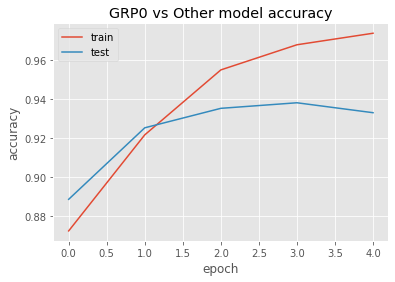

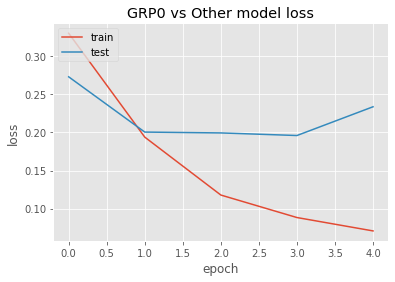

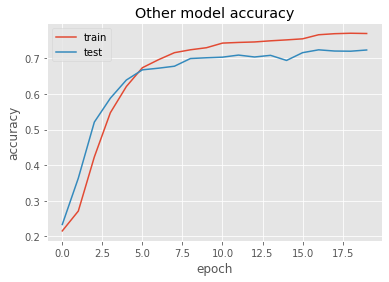

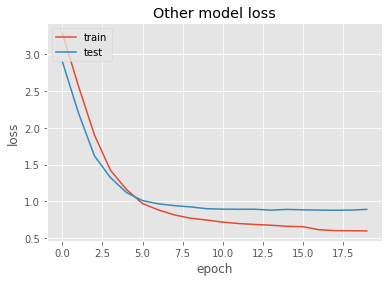

In [ ]:
model.plotModelAccuracy(model1_history, 'GRP0 vs Other')
model.plotModelAccuracy(model2_history, 'Other')

In [ ]:
results=captureData(results,model1_history,'LSTM 2 part model_WV_grp0','LSTM+Word2Vec Embedding on grp0_data','3',0)
results=captureData(results,model2_history,'LSTM 2 part model_WV_Others','LSTM+Word2Vec Embedding on Rest of groups','4',0)
pred_results= capturePrediction(pred_results,'LSTM 2 part model_WV','LSTM+Word2Vec Embedding on Augmented data','3',twoModel_sampledAccuracy,0)

## Glove embedding

#Download the glove embedding from https://nlp.stanford.edu/projects/glove/

In [ ]:
glove_file = project_path + "glove.6B.zip"
print(glove_file)

/content/drive/My Drive/Colab Notebooks/glove.6B.zip


In [ ]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [ ]:
EMBEDDING_FILE = './glove.6B.100d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

In [ ]:
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["collaboration"])))
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["platform"])))

Dimension of the embedding vector is 100
Dimension of the embedding vector is 100


In [ ]:
maxlen = 300
numWords=9000
epochs = 10

### LSTM Glove Model

In [ ]:
class LstmGloveModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val
	
  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()	

In [ ]:
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmGloveModel()
lstmModelRawData_history, model = lstmModelRawData.train(itTicketDF,100,epochs)
lstm_raw_accuracy = lstmModelRawData.prediction()

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 2.5781 - accuracy: 0.4764
Epoch 00001: val_accuracy improved from -inf to 0.52607, saving model to model-001-0.526066.h5
68/68 [==============================] - 123s 2s/step - loss: 2.5781 - accuracy: 0.4764 - val_loss: 2.2376 - val_accuracy: 0.5261
Epoch 2/10
68/68 [==============================] - ETA: 0s - loss: 2.0223 - accuracy: 0.5404
Epoch 00002: val_accuracy improved from 0.52607 to 0.55154, saving model to model-002-0.551540.h5
68/68 [==============================] - 124s 2s/step - loss: 2.0223 - accuracy: 0.5404 - val_loss: 1.9450 - val_accuracy: 0.5515
Epoch 3/10
68/68 [==============================] - ETA: 0s - loss: 1.8135 - accuracy: 0.5688
Epoch 00003: val_accuracy improved from 0.55154 to 0.56102, saving model to model-003-0.561019.h5
68/68 [==============================] - 123s 2s/step - loss:

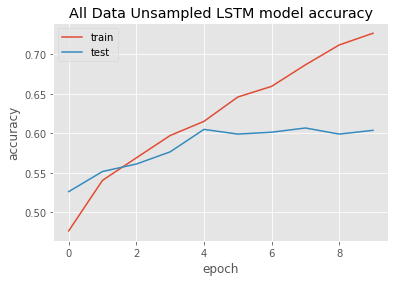

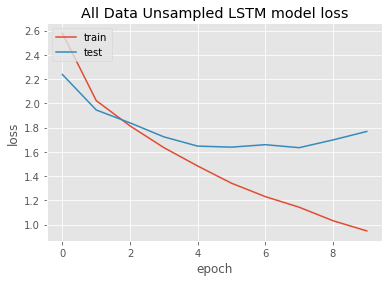

In [ ]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

In [ ]:
#Check how the LSTM Model perform with all the data which is cleansed & resampled to 661 to make the target balance
lstmModelAllDataResampled = LstmGloveModel()
lstmModelAllDataResampled_history, model = lstmModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
lstm_allResampled_accuracy = lstmModelAllDataResampled.prediction()

Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Epoch 1/10
265/265 [==============================] - ETA: 0s - loss: 2.5532 - accuracy: 0.3398
Epoch 00001: val_accuracy improved from -inf to 0.63828, saving model to model-001-0.638275.h5
265/265 [==============================] - 484s 2s/step - loss: 2.5532 - accuracy: 0.3398 - val_loss: 1.3375 - val_accuracy: 0.6383
Epoch 2/10
265/265 [==============================] - ETA: 0s - loss: 1.0338 - accuracy: 0.7120
Epoch 00002: val_accuracy improved from 0.63828 to 0.79455, saving model to model-002-0.794554.h5
265/265 [==============================] - 480s 2s/step - loss: 1.0338 - accuracy: 0.7120 - val_loss: 0.7408 - val_accuracy: 0.7946
Epoch 3/10
265/265 [==============================] - ETA: 0s - loss: 0.6169 - accuracy: 0.8248
Epoch 00003: val_accuracy improved from 0.79455 to 0.85688, saving model to model-003-0.856884.h5
265/265 [==============================] - 481s 

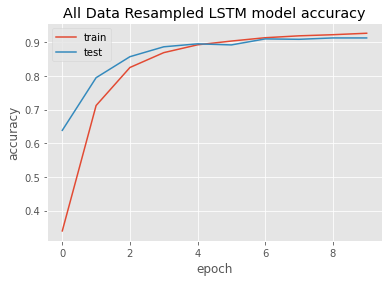

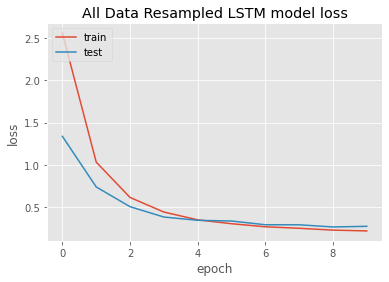

In [ ]:
lstmModelAllDataResampled.plotModelAccuracy(lstmModelAllDataResampled_history, 'All Data Resampled LSTM')

In [ ]:
results=captureData(results,lstmModelRawData_history,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','5',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','4',lstm_raw_accuracy,0)

In [ ]:
results=captureData(results,lstmModelAllDataResampled_history,'LSTM model_GloVe_resampled data','LSTM+GloVe Embedding on Augmented data','6',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_resampled data','LSTM+GloVe Embedding on Augmented data','5',lstm_allResampled_accuracy,0)

### GRU Model

In [ ]:
class GruGloveModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    gru=GRU(128)(embed)
    drop=Dropout(0.3)(gru)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    # self.model.summary()
    # plot_model(self.model,to_file="GRU.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy=metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

  def plotModel(self):
    self.model.summary()

In [ ]:
# Check how the GRU Model perform with the raw data
gruModelRawData = GruGloveModel()
gruModelRawData_history, model = gruModelRawData.train(itTicketDF,100,epochs)
gruRaw_accuracy = gruModelRawData.prediction()

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 2.4522 - accuracy: 0.5064
Epoch 00001: val_accuracy improved from -inf to 0.52962, saving model to model-001-0.529621.h5
68/68 [==============================] - 53s 773ms/step - loss: 2.4522 - accuracy: 0.5064 - val_loss: 2.0834 - val_accuracy: 0.5296
Epoch 2/10
68/68 [==============================] - ETA: 0s - loss: 2.0232 - accuracy: 0.5399
Epoch 00002: val_accuracy improved from 0.52962 to 0.53851, saving model to model-002-0.538507.h5
68/68 [==============================] - 52s 767ms/step - loss: 2.0232 - accuracy: 0.5399 - val_loss: 1.9803 - val_accuracy: 0.5385
Epoch 3/10
68/68 [==============================] - ETA: 0s - loss: 1.8439 - accuracy: 0.5534
Epoch 00003: val_accuracy improved from 0.53851 to 0.56161, saving model to model-003-0.561611.h5
68/68 [==============================] - 53s 775ms/step -

In [ ]:
gruModelRawData.plotModel()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 300, 100)          900100    
_________________________________________________________________
gru (GRU)                    (None, 128)               88320     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
Total params: 1,006,370
Trainable params: 1,006,370
Non-trainable params: 0
___________________________________________

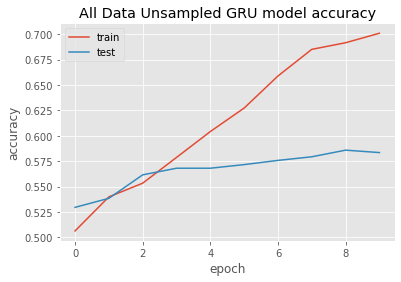

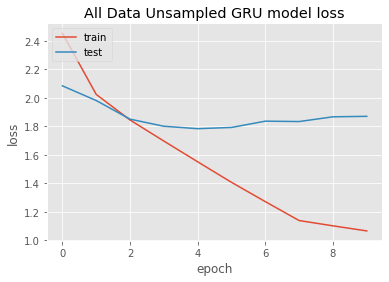

In [ ]:
gruModelRawData.plotModelAccuracy(gruModelRawData_history, 'All Data Unsampled GRU')

In [ ]:
# Check how the GRU Model perform with all the data which is cleansed & resampled to 661 to make the target balance
gruModelAllDataResampled = GruGloveModel()
gruModelAllDataResampled_history, model = gruModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
gruResampled_accuracy = gruModelAllDataResampled.prediction()

Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Epoch 1/10
265/265 [==============================] - ETA: 0s - loss: 3.1189 - accuracy: 0.1782
Epoch 00001: val_accuracy improved from -inf to 0.42194, saving model to model-001-0.421936.h5
265/265 [==============================] - 207s 779ms/step - loss: 3.1189 - accuracy: 0.1782 - val_loss: 2.0874 - val_accuracy: 0.4219
Epoch 2/10
265/265 [==============================] - ETA: 0s - loss: 1.3868 - accuracy: 0.6200
Epoch 00002: val_accuracy improved from 0.42194 to 0.78775, saving model to model-002-0.787746.h5
265/265 [==============================] - 205s 775ms/step - loss: 1.3868 - accuracy: 0.6200 - val_loss: 0.8001 - val_accuracy: 0.7877
Epoch 3/10
265/265 [==============================] - ETA: 0s - loss: 0.6305 - accuracy: 0.8262
Epoch 00003: val_accuracy improved from 0.78775 to 0.85734, saving model to model-003-0.857337.h5
265/265 [==============================] -

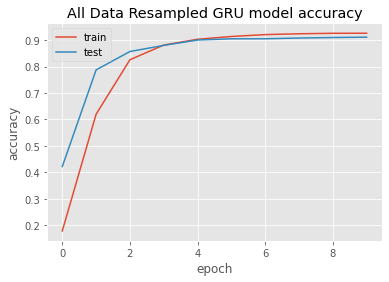

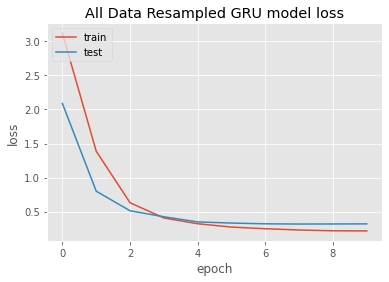

In [ ]:
gruModelAllDataResampled.plotModelAccuracy(gruModelAllDataResampled_history, 'All Data Resampled GRU')

In [ ]:
results=captureData(results,gruModelRawData_history,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','7',0)
pred_results= capturePrediction(pred_results,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','6',gruRaw_accuracy,0)

In [ ]:
results=captureData(results,gruModelAllDataResampled_history,'GRU model_GloVe_resampled data','GRU+GloVe Embedding on Augmented data','8',0)
pred_results= capturePrediction(pred_results,'GRU model_GloVe_resampled data','GRU+GloVe Embedding on Augmented data','7',gruResampled_accuracy,0)

### RNN Model 

In [ ]:
class RNNGloveModel:
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def train(self, dataframe, batch_size, epochs):
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)
    model=Sequential()
    model.add(Input(shape=(maxlen,),dtype=tf.int64))
    model.add(embed)
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(len((pd.Series(y_train)).unique()),activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    plot_model(model,to_file="RNN.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val, y_Val))
    return model_history, model

  def prediction(self,model):
      
     pred = model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
# Check how the RNN Model perform with the raw data
RNNModelRawData = RNNGloveModel()
RNNModelRawData_history, RnnModel = RNNModelRawData.train(itTicketDF,100,epochs)
RNNModelRawData_accuracy = RNNModelRawData.prediction(RnnModel)

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 300, 100)          900100    
_________________________________________________________________
conv1d (Conv1D)              (None, 291, 100)          100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 145, 100)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 145, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 68, 100)           0         
________________

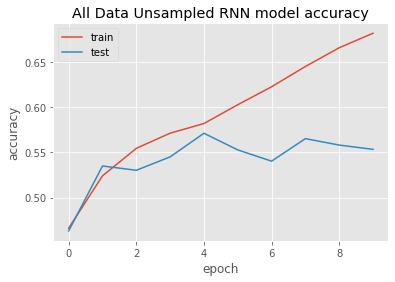

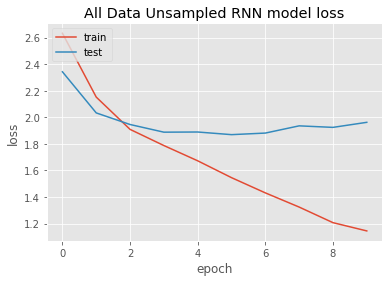

In [ ]:
RNNModelRawData.plotModelAccuracy(RNNModelRawData_history, 'All Data Unsampled RNN')

In [ ]:
#Check how the RNN Model perform with all the data which is cleansed & resampled to 661 to make the target balance
RNNModelAllDataResampled = RNNGloveModel()
RNNModelAllDataResampled_history, RnnModel = RNNModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
RNNModelResampled_accuracy = RNNModelAllDataResampled.prediction(RnnModel)

Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 100)          900100    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 291, 100)          100100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 145, 100)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 145, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 68, 100)           0         
___________

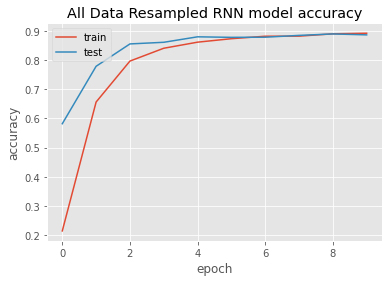

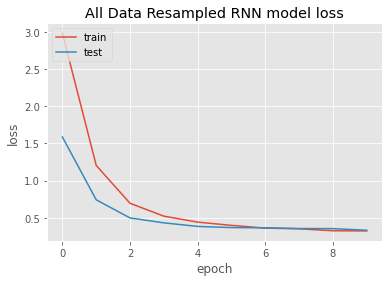

In [ ]:
RNNModelAllDataResampled.plotModelAccuracy(RNNModelAllDataResampled_history, 'All Data Resampled RNN')

In [ ]:
results=captureData(results,RNNModelRawData_history,'RNN model_GloVe_rawdata','RNN+GloVe Embedding on raw data','9',0)
pred_results= capturePrediction(pred_results,'RNN model_GloVe_rawdata','RNN+GloVe Embedding on raw data','8',RNNModelRawData_accuracy,0)

In [ ]:
results=captureData(results,RNNModelAllDataResampled_history,'RNN model_GloVe_resampled data','RNN+GloVe Embedding on Augmented data','10',0)
pred_results= capturePrediction(pred_results,'RNN model_GloVe_resampled data','RNN+GloVe Embedding on Augmented data','9',RNNModelResampled_accuracy,0)

In [ ]:
results

model  ...                               descriptions
1             LSTM model_WV_rawdata  ...        LSTM+Word2Vec Embedding on raw data
2      LSTM model_WV_resampled data  ...  LSTM+Word2Vec Embedding on Augmented data
3         LSTM 2 part model_WV_grp0  ...       LSTM+Word2Vec Embedding on grp0_data
4       LSTM 2 part model_WV_Others  ...  LSTM+Word2Vec Embedding on Rest of groups
5          LSTM model_GloVe_rawdata  ...           LSTM+GloVe Embedding on raw data
6   LSTM model_GloVe_resampled data  ...     LSTM+GloVe Embedding on Augmented data
7           GRU model_GloVe_rawdata  ...            GRU+GloVe Embedding on raw data
8    GRU model_GloVe_resampled data  ...      GRU+GloVe Embedding on Augmented data
9           RNN model_GloVe_rawdata  ...            RNN+GloVe Embedding on raw data
10   RNN model_GloVe_resampled data  ...      RNN+GloVe Embedding on Augmented data
9           RNN model_GloVe_rawdata  ...            RNN+GloVe Embedding on raw data
10   RNN model_GloVe_resampled data  ...      RNN+GloVe Embedding on Augmented data

[12 rows x 6 columns]

In [ ]:
pred_results

model  ...                               descriptions
1            LSTM model_WV_rawdata  ...        LSTM+Word2Vec Embedding on raw data
2     LSTM model_WV_resampled data  ...  LSTM+Word2Vec Embedding on Augmented data
3             LSTM 2 part model_WV  ...  LSTM+Word2Vec Embedding on Augmented data
4         LSTM model_GloVe_rawdata  ...           LSTM+GloVe Embedding on raw data
5  LSTM model_GloVe_resampled data  ...     LSTM+GloVe Embedding on Augmented data
6          GRU model_GloVe_rawdata  ...            GRU+GloVe Embedding on raw data
7   GRU model_GloVe_resampled data  ...      GRU+GloVe Embedding on Augmented data
8          RNN model_GloVe_rawdata  ...            RNN+GloVe Embedding on raw data
9   RNN model_GloVe_resampled data  ...      RNN+GloVe Embedding on Augmented data
8          RNN model_GloVe_rawdata  ...            RNN+GloVe Embedding on raw data
9   RNN model_GloVe_resampled data  ...      RNN+GloVe Embedding on Augmented data

[11 rows x 3 columns]